# Goal

Using ML algorithms such as transfer learing and Open CV Computer Vision to identify the objects in the video and build KPI metrics

## Steps:
1. Install and Import Dependencies
2. Load the model
3. Once we achieve the accuracy and performance - Create a docker which can be deployed to cloud platform - AWS, Azure or Google
4. Save it to the database
5. Create a dashboard with KPI metrics

## 1. Install and Import Dependencies

In [3]:
#!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

/home/srinu/video-analytics/yolov5
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np
import cv2


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v6.1-69-g7830e91 torch 1.11.0 CPU


Setup complete ✅ (12 CPUs, 62.5 GB RAM, 610.3/1828.6 GB disk)


# 2. Data Handling

In [4]:
def create_data_directories(data_name):
    Path(f"../datasets/{data_name}/images/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)

    
create_data_directories('Peoples_data')

# 3. Training

## Feature extraction

In [ ]:
# Weights & Biases  (optional)
#%pip install -q wandb
import wandb
wandb.login()

In [6]:
!python3 train.py --batch 32 --epochs 150 --data 'data/coco128.yaml' --weights 'yolov5s6.pt' --project 'runs_peoples' --name 'feature_extraction' --cache --freeze 12
clear_output()

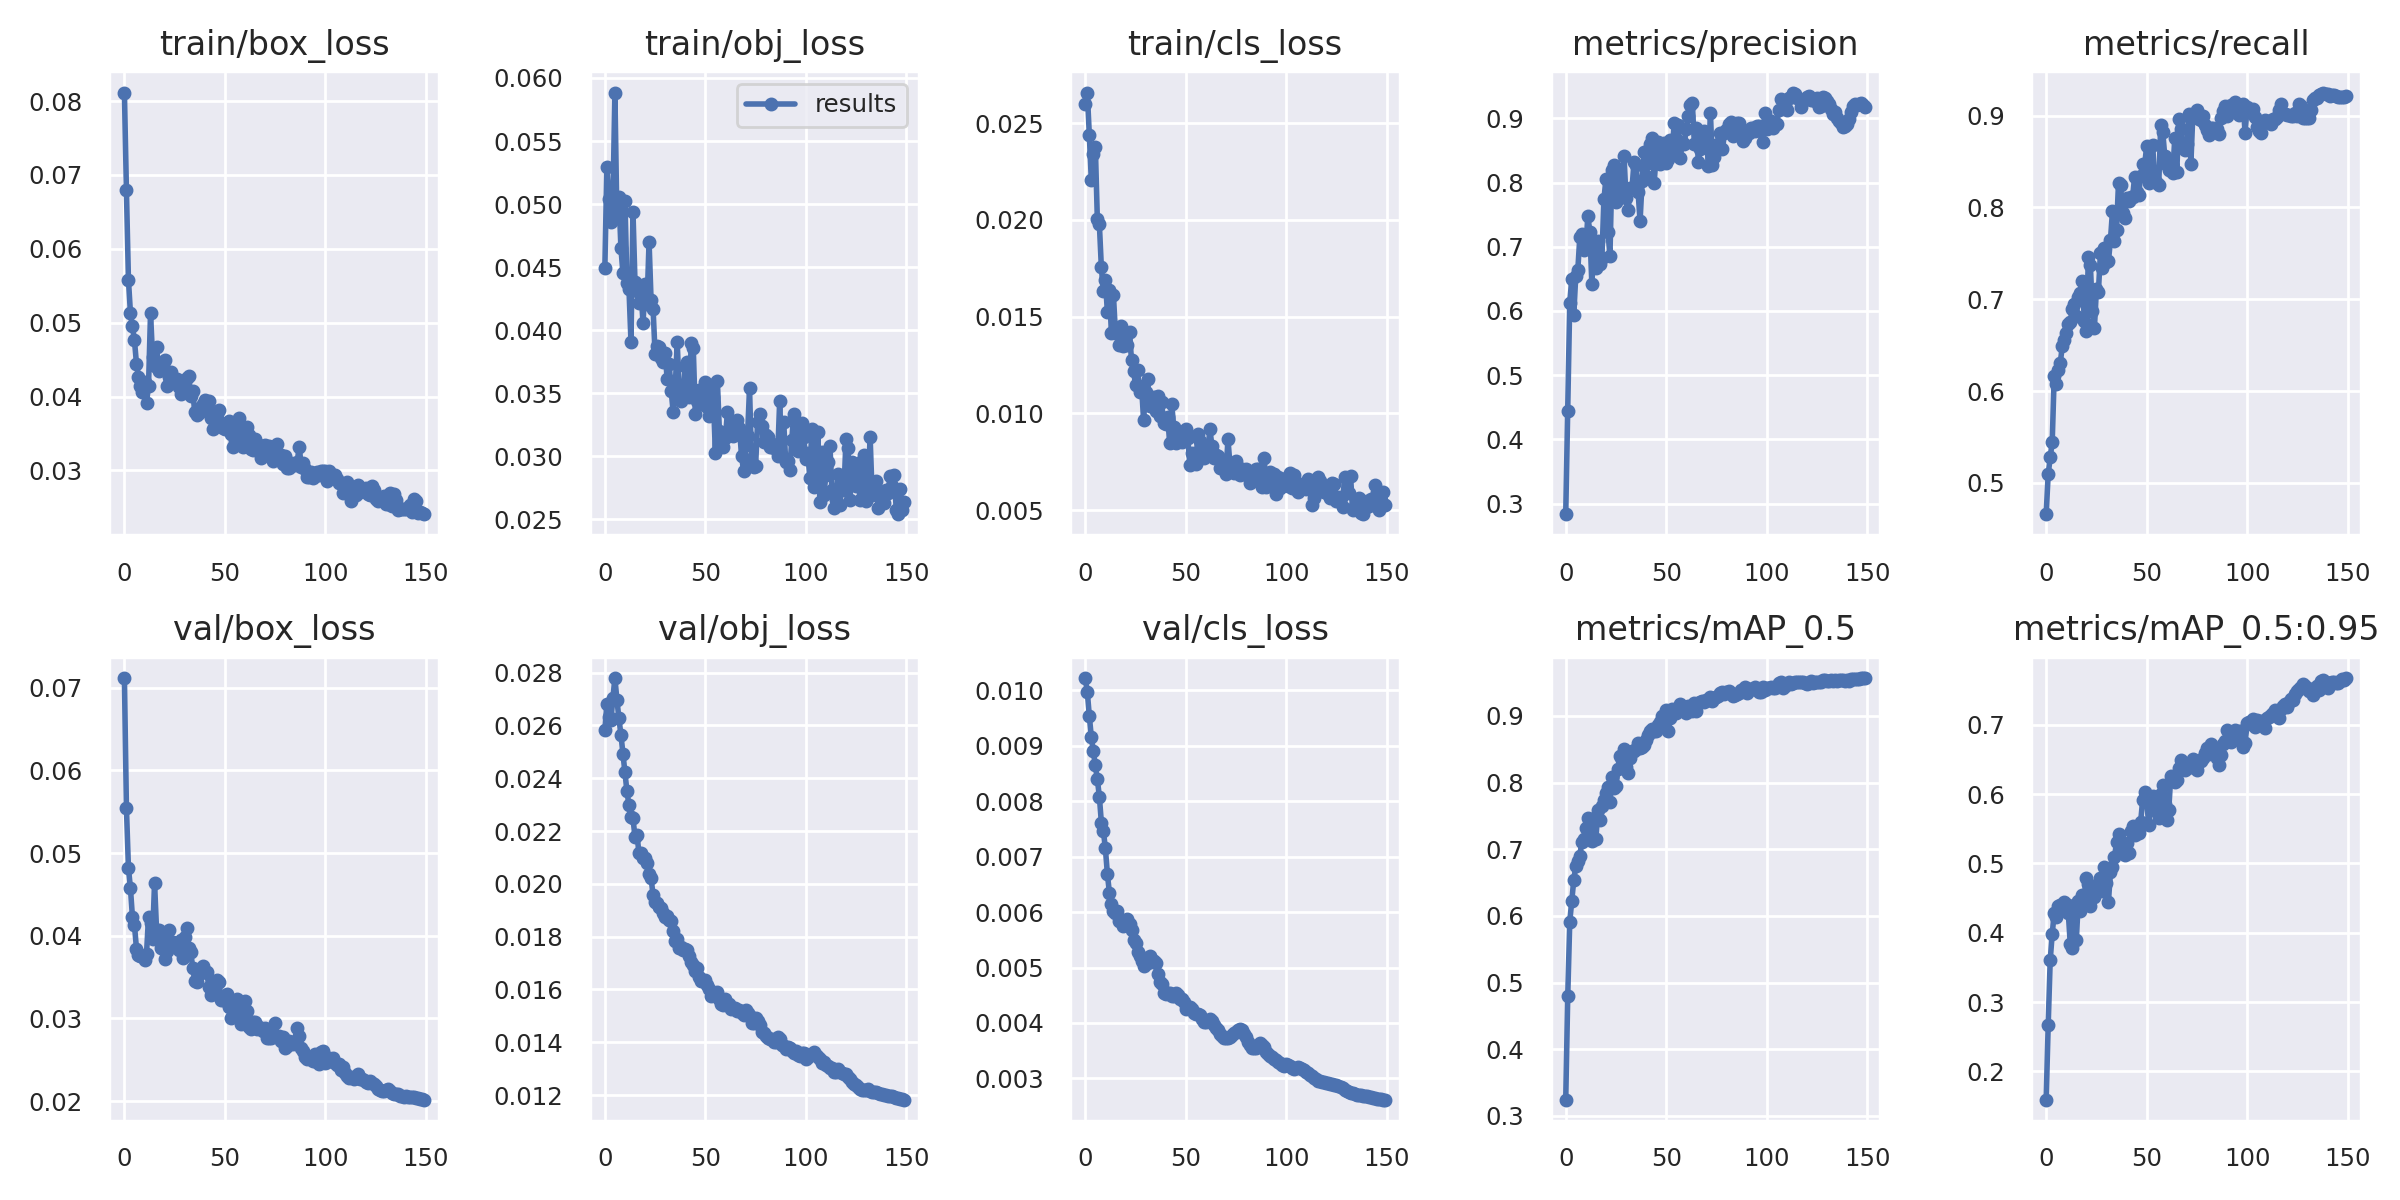

In [9]:
display.Image(f"runs_peoples/feature_extraction/results.png")

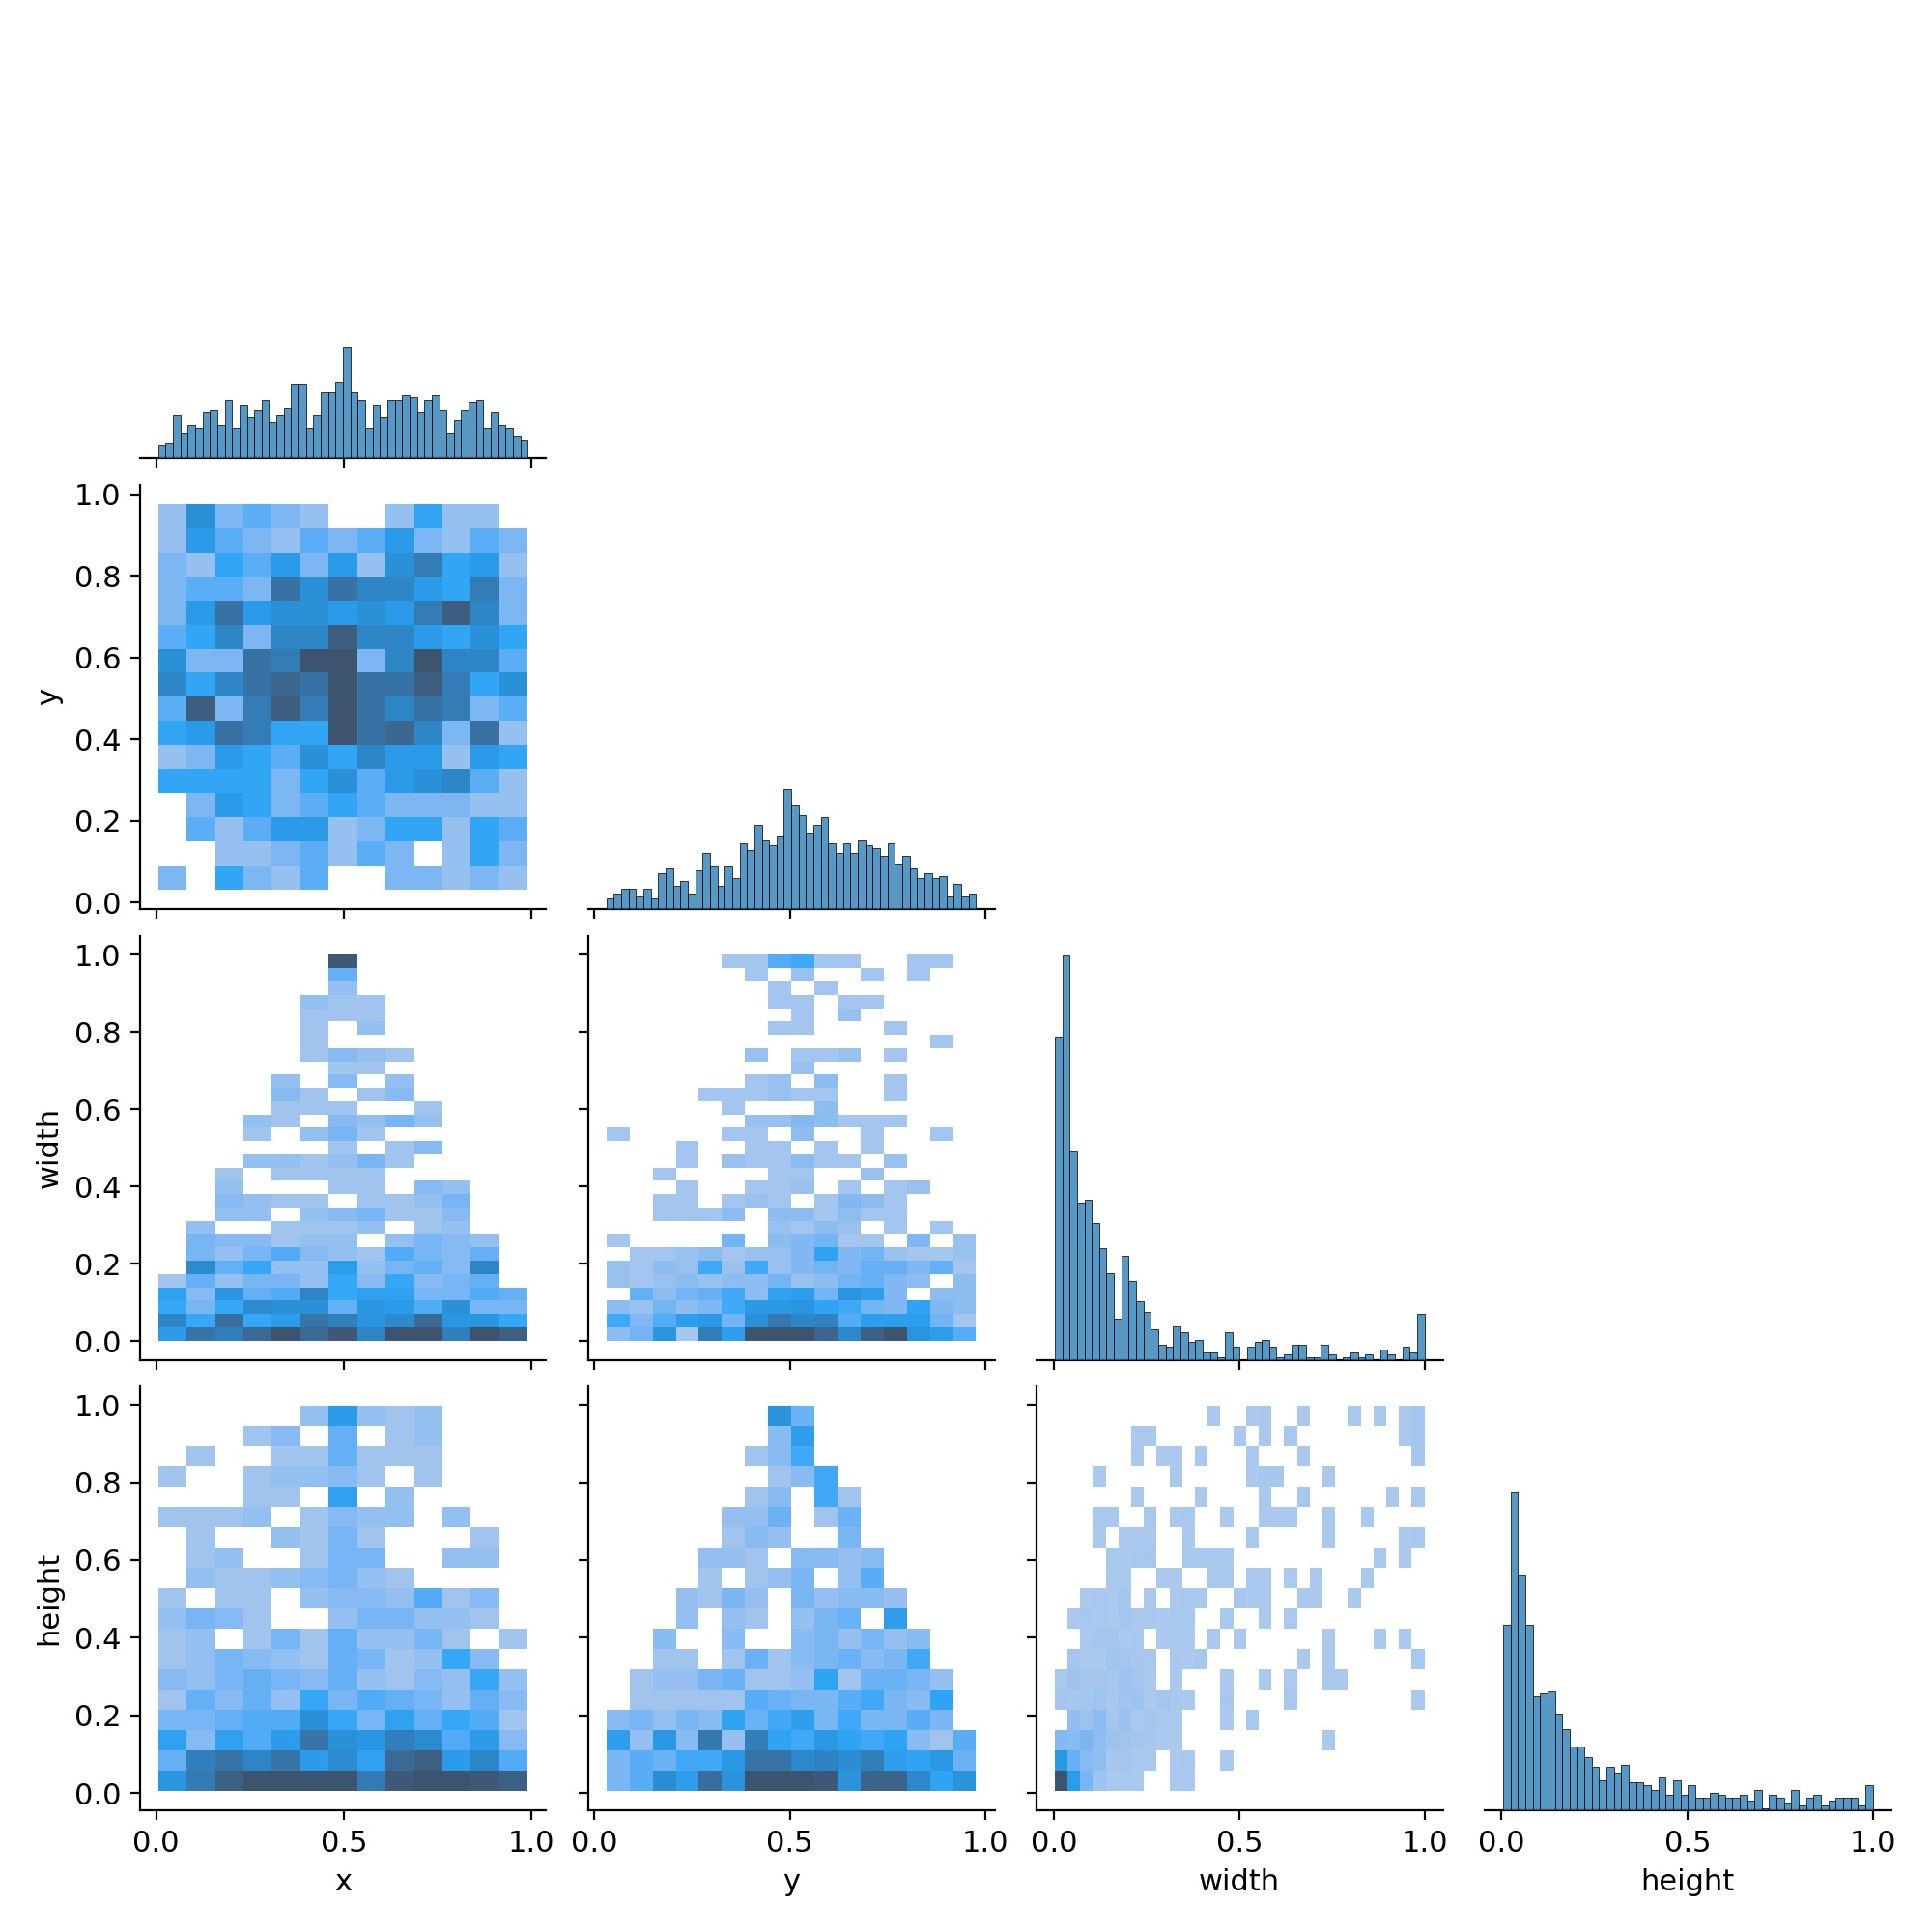

In [17]:
display.Image(f"runs_peoples/feature_extraction2/labels_correlogram.jpg")

## Fine Tuning

In [10]:
!python3 train.py --hyp 'hyp.finetune.yaml' --batch 16 --epochs 100 --data 'data/coco128.yaml' --weights 'runs_peoples/feature_extraction2/weights/best.pt' --project 'runs_peoples' --name 'fine-tuning' --cache
clear_output()

# 4. Validate

## COCO Test

In [4]:
# Download COCO val
#torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
#!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [11]:
# Run YOLOv5s on COCO val
!python3 val.py --weights yolov5s.pt --data coco128.yaml --img 640 --iou 0.65 --half
clear_output()

# 5. Inference and Test

In [15]:
# Detect only people
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --classes 0 --source ../data/VIRAT_S_000202_00_000000_000977.mp4
clear_output()

detect: weights=['yolov5s.pt'], source=../data/VIRAT_S_000202_00_000000_000977.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-69-g7830e91 torch 1.11.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
video 1/1 (1/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.043s)
video 1/1 (3/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (4/29310) /home/srinu/video-anal

video 1/1 (64/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.041s)
video 1/1 (65/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.039s)
video 1/1 (66/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.041s)
video 1/1 (67/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.041s)
video 1/1 (68/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.039s)
video 1/1 (69/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.040s)
video 1/1 (70/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.040s)
video 1/1 (71/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.040s)
vid

video 1/1 (131/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (132/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.044s)
video 1/1 (133/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (134/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (135/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (138/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.04

video 1/1 (197/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (198/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.043s)
video 1/1 (199/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.045s)
video 1/1 (200/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (201/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043s)
video 1/1 (202/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043

video 1/1 (263/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (264/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (265/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (266/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.041s)
video 1/1 (267/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.044s)
video 1/1 (268/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (271/29310) /home/srinu/video-

video 1/1 (330/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (331/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.044s)
video 1/1 (332/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (333/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (334/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (335/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (336/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (337/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)


video 1/1 (396/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (397/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (398/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (399/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (400/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (401/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (402/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (403/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)


video 1/1 (462/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (463/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (464/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (465/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (466/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (467/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (468/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (469/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (

video 1/1 (528/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (529/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (530/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (531/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (532/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (533/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (534/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (535/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (

video 1/1 (594/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (595/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (596/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (597/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (598/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (599/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (600/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (601/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)


video 1/1 (660/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (661/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (662/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (663/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (664/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (665/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (666/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (667/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s

video 1/1 (726/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (727/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (728/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (729/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (730/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (731/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (732/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (733/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)


video 1/1 (792/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (793/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (794/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (795/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (796/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (797/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (798/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (799/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.

video 1/1 (858/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (859/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (860/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.044s)
video 1/1 (861/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (862/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (863/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (864/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (865/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)


video 1/1 (924/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (925/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (926/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (927/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (928/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (929/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (930/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (931/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (

video 1/1 (990/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (991/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (992/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (993/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (994/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (995/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (996/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.047s)
video 1/1 (997/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (

video 1/1 (1055/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (1056/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (1057/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (1058/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1059/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1060/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (1061/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1062/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (1120/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (1121/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (1122/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (1123/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (1124/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (1125/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (1126/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (1127/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (1185/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (1186/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (1187/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (1188/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (1189/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (1190/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (1191/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.043s)
video 1/1 (1192/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons,

video 1/1 (1250/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (1251/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (1252/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (1253/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (1254/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (1255/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (1256/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1257/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, 

video 1/1 (1317/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (1318/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1319/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (1320/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (1321/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (1322/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1323/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1324/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (1383/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1384/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1385/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (1386/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1387/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1388/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (1389/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1390/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. 

video 1/1 (1451/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.058s)
video 1/1 (1452/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (1453/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (1454/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (1455/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (1456/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (1457/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (1458/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1459/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (1521/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (1522/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.044s)
video 1/1 (1523/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1524/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (1525/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (1526/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (1527/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (1528/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (1529/29310) /home/srinu/video-analytics/d

video 1/1 (1587/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (1588/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (1589/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (1590/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (1591/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1592/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.044s)
video 1/1 (1593/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (1594/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done.

video 1/1 (1652/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1653/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (1654/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1655/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (1656/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (1657/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1658/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (1659/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (1717/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1718/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.043s)
video 1/1 (1719/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (1720/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1721/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1722/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (1723/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1724/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done.

video 1/1 (1782/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1783/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1784/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1785/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1786/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (1787/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (1788/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.060s)
video 1/1 (1789/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Do

video 1/1 (1847/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1848/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (1849/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (1850/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (1851/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (1852/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1853/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (1854/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (1912/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (1913/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (1914/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1915/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (1916/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1917/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (1918/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (1919/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (1978/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (1979/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (1980/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (1981/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (1982/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (1983/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (1984/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (1985/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (2046/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2047/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2048/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (2049/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (2050/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (2051/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2052/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2053/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (2113/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2114/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2115/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (2116/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.055s)
video 1/1 (2117/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2118/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (2119/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2120/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Do

video 1/1 (2178/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2179/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2180/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (2181/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (2182/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (2183/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (2184/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (2185/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. 

video 1/1 (2243/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (2244/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2245/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2246/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (2247/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (2248/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (2249/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2250/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done

video 1/1 (2308/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (2309/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (2310/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (2311/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (2312/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (2313/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (2314/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (2315/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, 

video 1/1 (2373/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (2374/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (2375/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2376/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (2377/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (2378/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (2379/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2380/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (2438/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (2439/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (2440/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (2441/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (2442/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (2443/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (2444/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (2445/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, D

video 1/1 (2503/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (2504/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (2505/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (2506/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (2507/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2508/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2509/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2510/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Do

video 1/1 (2570/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2571/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (2572/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (2573/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2574/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (2575/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2576/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2577/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
vi

video 1/1 (2636/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (2637/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (2638/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (2639/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (2640/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2641/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2642/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (2643/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Don

video 1/1 (2701/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (2702/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (2703/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2704/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (2705/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2706/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (2707/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (2708/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, 

video 1/1 (2766/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2767/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (2768/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2769/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (2770/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (2771/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2772/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2773/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, D

video 1/1 (2831/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.055s)
video 1/1 (2832/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (2833/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (2834/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (2835/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (2836/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (2837/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (2838/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (2896/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (2897/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (2898/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2899/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2900/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2901/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2902/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2903/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2

video 1/1 (2962/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (2963/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2964/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2965/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (2966/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2967/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (2968/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (2969/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (3028/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3029/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (3030/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (3031/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3032/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (3033/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (3034/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3035/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (3094/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3095/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.056s)
video 1/1 (3096/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3097/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3098/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (3099/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (3100/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3101/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (3102/29310) /home/sri

video 1/1 (3165/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3166/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3167/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3168/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (3169/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3170/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (3171/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (3172/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (3173/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (3236/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3237/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (3238/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (3239/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3240/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (3241/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3242/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3243/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (3244/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (3307/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (3308/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3309/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3310/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (3311/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3312/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (3313/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3314/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3315/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (3376/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (3377/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (3378/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (3379/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3380/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3381/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (3382/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3383/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3384/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (3443/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3444/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043s)
video 1/1 (3445/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3446/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3447/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3448/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (3449/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (3450/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done.

video 1/1 (3513/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (3514/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3515/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (3516/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3517/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (3518/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (3519/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3520/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3521/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (3584/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (3585/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3586/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3587/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3588/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3589/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3590/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3591/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (3592/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (3654/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (3655/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3656/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3657/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3658/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3659/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (3660/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (3661/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (3724/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3725/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (3726/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (3727/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3728/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (3729/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (3730/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (3731/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (3732/29310) /home/srinu/video-a

video 1/1 (3790/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (3791/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (3792/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3793/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3794/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (3795/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (3796/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (3797/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. 

video 1/1 (3856/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (3857/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (3858/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (3859/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (3860/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (3861/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (3862/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3863/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (3923/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (3924/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (3925/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (3926/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3927/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3928/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3929/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3930/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (3931/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (3991/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (3992/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (3993/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (3994/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.044s)
video 1/1 (3995/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (3996/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (3997/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (3998/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (3999/29310)

video 1/1 (4061/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4062/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (4063/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (4064/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4065/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4066/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (4067/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (4069/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (4129/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4130/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.044s)
video 1/1 (4131/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4132/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4133/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4134/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4135/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (4137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4200/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4201/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4202/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (4204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.044s)
video 1/1 (4205/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (4206/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4207/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (4208/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (4270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4271/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4272/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (4273/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4274/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (4275/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (4276/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4277/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4340/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (4341/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (4342/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4343/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4344/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (4345/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (4346/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4347/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4348/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4411/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (4412/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4413/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (4414/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (4415/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (4416/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4417/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4418/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4419/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4482/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4483/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4484/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4485/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4486/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4487/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (4488/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (4489/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4490/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4550/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (4551/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (4552/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (4553/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (4554/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (4555/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043s)
video 1/1 (4556/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (4557/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (4616/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (4617/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4618/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (4619/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4620/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4621/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (4622/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4623/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.044s)
video 1/1 (4624/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (4687/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (4688/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.058s)
video 1/1 (4689/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (4690/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4691/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4692/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (4693/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4694/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (4695/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4758/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (4759/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4760/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (4761/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4762/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4763/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (4764/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4765/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4766/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (4826/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (4827/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (4828/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (4829/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (4830/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (4831/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (4832/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (4833/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (4891/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (4892/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4893/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4894/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4895/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (4896/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (4897/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (4898/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (4899/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (4959/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (4960/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (4961/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (4962/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (4963/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (4964/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.055s)
video 1/1 (4965/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (4966/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, 

video 1/1 (5024/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5025/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (5026/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5027/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (5028/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (5029/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5030/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5031/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. 

video 1/1 (5089/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (5090/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5091/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5092/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5093/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (5094/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (5095/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.044s)
video 1/1 (5096/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done

video 1/1 (5154/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5155/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043s)
video 1/1 (5156/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5157/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (5158/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (5159/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (5160/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5161/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (5221/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (5222/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (5223/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (5224/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.044s)
video 1/1 (5225/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (5226/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (5227/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (5228/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (5229/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (5289/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (5290/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (5291/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (5292/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (5293/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5294/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (5295/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (5296/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done.

video 1/1 (5354/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (5355/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.045s)
video 1/1 (5356/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (5357/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (5358/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (5359/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (5360/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (5361/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons,

video 1/1 (5419/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (5420/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (5421/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.043s)
video 1/1 (5422/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (5423/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (5424/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (5425/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (5426/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons,

video 1/1 (5484/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (5485/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5486/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (5487/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5488/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (5489/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.043s)
video 1/1 (5490/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5491/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, 

video 1/1 (5550/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5551/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5552/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (5553/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (5554/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5555/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (5556/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (5557/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, D

video 1/1 (5615/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5616/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (5617/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (5618/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5619/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043s)
video 1/1 (5620/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (5621/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (5622/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Don

video 1/1 (5682/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5683/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (5684/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (5685/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5686/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (5687/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5688/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5689/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (5750/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (5751/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (5752/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5753/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (5754/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.043s)
video 1/1 (5755/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (5756/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (5757/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, 

video 1/1 (5815/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (5816/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5817/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (5818/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5819/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (5820/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (5821/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (5822/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (5881/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (5882/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5883/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (5884/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5885/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (5886/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (5887/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (5888/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (5

video 1/1 (5947/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (5948/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (5949/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (5950/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (5951/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.045s)
video 1/1 (5952/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (5953/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (5954/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons,

video 1/1 (6012/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (6013/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (6014/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (6015/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (6016/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (6017/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (6018/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (6019/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (6077/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (6078/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (6079/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (6080/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (6081/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6082/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6083/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (6084/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done.

video 1/1 (6143/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (6144/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (6145/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6146/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6147/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (6148/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6149/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6150/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (6208/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (6209/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (6210/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (6211/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6212/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6213/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6214/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6215/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (6274/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6275/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (6276/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6277/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6278/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6279/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (6280/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (6281/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (6340/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (6341/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (6342/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (6343/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6344/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (6345/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6346/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6347/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Don

video 1/1 (6406/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6407/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (6408/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6409/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6410/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043s)
video 1/1 (6411/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6412/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6413/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (6472/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (6473/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6474/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (6475/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (6476/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6477/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6478/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6479/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6480/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (6539/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6540/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (6541/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (6542/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6543/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6544/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (6545/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6546/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (6

video 1/1 (6608/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (6609/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (6610/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6611/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (6612/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6613/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (6614/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.043s)
video 1/1 (6615/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6616/29310) /home/sri

video 1/1 (6675/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (6676/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (6677/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (6678/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6679/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6680/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6681/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (6682/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (6741/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (6742/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6743/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (6744/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6745/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (6746/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (6747/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (6748/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (6749/29310)

video 1/1 (6810/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (6811/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (6812/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (6813/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (6814/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6815/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6816/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6817/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (6818/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (6881/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (6882/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (6883/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6884/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6885/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (6886/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (6887/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (6888/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (6889/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (6952/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6953/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6954/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6955/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (6956/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6957/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6958/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (6959/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (6960/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7023/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7024/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (7025/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (7026/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7027/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (7028/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7029/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7030/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7031/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7094/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (7095/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7096/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7097/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (7098/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7099/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7100/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7101/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (7102/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7165/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (7166/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (7167/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7168/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7169/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7170/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7171/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.056s)
video 1/1 (7172/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.071s)
video 1/1 (7173/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7236/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.056s)
video 1/1 (7237/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.057s)
video 1/1 (7238/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.067s)
video 1/1 (7239/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.068s)
video 1/1 (7240/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.068s)
video 1/1 (7241/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.067s)
video 1/1 (7242/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.060s)
video 1/1 (7243/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (7244/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7305/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (7306/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (7307/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.061s)
video 1/1 (7308/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (7309/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (7310/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (7311/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7312/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7

video 1/1 (7373/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (7374/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (7375/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (7376/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (7377/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (7378/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (7379/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (7380/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (7438/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (7439/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (7440/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (7441/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (7442/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (7443/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (7444/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (7445/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (7507/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (7508/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (7509/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7510/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7511/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7512/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7513/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7514/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (7515/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7578/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (7579/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (7580/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (7581/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (7582/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (7583/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7584/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7585/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7586/29310) /home/sri

video 1/1 (7648/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7649/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7650/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7651/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (7652/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7653/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7654/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7655/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7656/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7719/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (7720/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7721/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (7722/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (7723/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (7724/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (7725/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7726/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (7727/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7790/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (7791/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (7792/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7793/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (7794/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7795/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7796/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7797/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7798/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7858/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (7859/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7860/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7861/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7862/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7863/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7864/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (7865/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7866/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (7929/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (7930/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (7931/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7932/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (7933/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (7934/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (7935/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (7936/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (7937/29310) /home/srinu/video-analytics/d

video 1/1 (7999/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8000/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8001/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (8002/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8003/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8004/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8005/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8006/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8066/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8067/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (8068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8069/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (8070/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8071/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8072/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (8073/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8134/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8135/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (8136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (8137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (8138/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8139/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8140/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (8141/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (8142/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (8202/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (8205/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8206/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8207/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8208/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8209/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8267/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (8268/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (8269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (8270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8271/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8272/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (8273/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.063s)
video 1/1 (8274/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8335/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8336/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8337/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8338/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8339/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (8340/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (8341/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (8342/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8343/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (8406/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (8407/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (8408/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.058s)
video 1/1 (8409/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.068s)
video 1/1 (8410/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (8411/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (8412/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (8413/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (8414/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_0

video 1/1 (8473/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8474/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (8475/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8476/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8477/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8478/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8479/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8480/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8539/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8540/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8541/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (8542/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (8543/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8544/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8545/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8546/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8605/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (8606/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8607/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8608/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8609/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8610/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (8611/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8612/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8671/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (8672/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8673/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8674/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (8675/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8676/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8677/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8678/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8737/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8738/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (8739/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8740/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8741/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8742/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8743/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (8744/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8803/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (8804/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (8805/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.059s)
video 1/1 (8806/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (8807/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8808/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8809/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8810/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8869/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (8870/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8871/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8872/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (8873/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8874/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8875/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (8876/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (8935/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8936/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (8937/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8938/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (8939/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (8940/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (8941/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (8942/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9001/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9002/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9003/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9004/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.058s)
video 1/1 (9005/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9006/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9007/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9008/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9067/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (9068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (9069/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (9070/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9071/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (9072/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9073/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9074/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9133/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (9134/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9135/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9138/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (9139/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9140/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9199/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9200/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9201/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9202/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9205/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (9206/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9266/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (9267/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (9268/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (9269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (9270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (9271/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (9272/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (9273/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9274/29310) /home/srinu/video-analytics/data/VIRAT_

video 1/1 (9332/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (9333/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9334/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9335/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9336/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9337/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (9338/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9339/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9398/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9399/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9400/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (9401/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9402/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9403/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9404/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9405/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9464/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (9465/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9466/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9467/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9468/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9469/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (9470/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9471/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9530/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9531/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9532/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9533/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9534/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (9535/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9536/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9537/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9596/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9597/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9598/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (9599/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (9600/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9601/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9602/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9603/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9662/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9663/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (9664/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9665/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9666/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9667/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (9668/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9669/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9727/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (9728/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (9729/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (9730/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (9731/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (9732/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (9733/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (9734/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (9792/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9793/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9794/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9795/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9796/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9797/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (9798/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9799/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (9857/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (9858/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (9859/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (9860/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (9861/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (9862/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (9863/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (9864/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons,

video 1/1 (9922/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9923/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9924/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9925/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9926/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (9927/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (9928/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (9929/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (9

video 1/1 (9989/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (9990/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (9991/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9992/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (9993/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (9994/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (9995/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (9996/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done

video 1/1 (10054/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.066s)
video 1/1 (10055/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.059s)
video 1/1 (10056/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10057/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (10058/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (10059/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10060/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10061/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (10123/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (10124/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (10125/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.057s)
video 1/1 (10126/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.068s)
video 1/1 (10127/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.064s)
video 1/1 (10128/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.065s)
video 1/1 (10129/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.062s)
video 1/1 (10130/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.062s)
video 1/1 (10131/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (10194/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10195/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.065s)
video 1/1 (10196/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10197/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10198/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.058s)
video 1/1 (10199/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (10200/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (10201/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (10202/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (10264/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.068s)
video 1/1 (10265/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.062s)
video 1/1 (10266/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.057s)
video 1/1 (10267/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (10268/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (10269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (10271/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (10272/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (10333/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10334/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10335/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (10336/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (10337/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (10338/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10339/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (10340/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10341/29310) /home/srinu/video-an

video 1/1 (10403/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10404/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (10405/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (10406/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (10407/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (10408/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (10409/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (10410/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (10411/29310) /home/srinu/video-an

video 1/1 (10472/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.060s)
video 1/1 (10473/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.058s)
video 1/1 (10474/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10475/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10476/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10477/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (10478/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10479/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10480/29310) /home/srinu/video-an

video 1/1 (10541/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.068s)
video 1/1 (10542/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.074s)
video 1/1 (10543/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.067s)
video 1/1 (10544/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.073s)
video 1/1 (10545/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.071s)
video 1/1 (10546/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.067s)
video 1/1 (10547/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10548/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
vide

video 1/1 (10608/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10609/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (10610/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (10611/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (10612/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (10613/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (10614/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (10615/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (10616/29310) /home/srinu/video-an

video 1/1 (10674/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (10675/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10676/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10677/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10678/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (10679/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10680/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10681/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (10741/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (10742/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (10743/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (10744/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10745/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10746/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (10747/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (10748/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (10806/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (10807/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (10808/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (10809/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10810/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (10811/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.059s)
video 1/1 (10812/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (10813/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (10871/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10872/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (10873/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (10874/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (10875/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (10876/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10877/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (10878/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 person

video 1/1 (10936/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (10937/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (10938/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (10939/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (10940/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (10941/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (10942/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (10943/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (10944/29310

video 1/1 (11002/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (11003/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (11004/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (11005/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (11006/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11007/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (11008/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11009/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pe

video 1/1 (11067/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (11068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11069/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11070/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (11071/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (11072/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (11073/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (11074/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pe

video 1/1 (11132/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (11133/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (11134/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (11135/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (11136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (11137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (11138/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (11139/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (11197/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.055s)
video 1/1 (11198/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (11199/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.054s)
video 1/1 (11200/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (11201/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (11202/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (11203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (11204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (11262/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.058s)
video 1/1 (11263/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (11264/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (11265/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (11266/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (11267/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (11268/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (11269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 person

video 1/1 (11327/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (11328/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (11329/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (11330/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (11331/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.069s)
video 1/1 (11332/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (11333/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (11334/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pe

video 1/1 (11394/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (11395/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (11396/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (11397/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (11398/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (11399/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11400/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11401/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (11402/29310) /home/srin

video 1/1 (11464/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (11465/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (11466/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (11467/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (11468/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (11469/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (11470/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (11471/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (114

video 1/1 (11533/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11534/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (11535/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (11536/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11537/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (11538/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11539/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (11540/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (11541/29310) /home/srinu/video-analytics/da

video 1/1 (11603/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11604/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (11605/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11606/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (11607/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11608/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11609/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11610/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (11611/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (11673/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (11674/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (11675/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (11676/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11677/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11678/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11679/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11680/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (11681/29310) 

video 1/1 (11741/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (11742/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (11743/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (11744/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (11745/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (11746/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (11747/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.044s)
video 1/1 (11748/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (11806/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11807/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (11808/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11809/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (11810/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (11811/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (11812/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (11813/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 perso

video 1/1 (11871/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.070s)
video 1/1 (11872/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.070s)
video 1/1 (11873/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.076s)
video 1/1 (11874/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.074s)
video 1/1 (11875/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.074s)
video 1/1 (11876/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.074s)
video 1/1 (11877/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.071s)
video 1/1 (11878/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 per

video 1/1 (11936/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (11937/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11938/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11939/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11940/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (11941/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11942/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (11943/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (12001/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (12002/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (12003/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12004/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12005/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (12006/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12007/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12008/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (120

video 1/1 (12067/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (12068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (12069/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (12070/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (12071/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.056s)
video 1/1 (12072/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (12073/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (12074/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (12075/29310) /home/srinu/video-analytics/da

video 1/1 (12136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (12137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (12138/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (12139/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (12140/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (12141/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (12142/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (12143/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (12144/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (12203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (12204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (12205/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12206/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12207/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (12208/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (12209/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (12210/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
vide

video 1/1 (12270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (12271/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (12272/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (12273/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (12274/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (12275/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (12276/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (12277/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (12278/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (12338/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (12339/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (12340/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (12341/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (12342/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (12343/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (12344/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (12345/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12346/29310) /home/srin

video 1/1 (12404/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12405/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (12406/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (12407/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (12408/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (12409/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (12410/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (12411/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
v

video 1/1 (12471/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12472/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (12473/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (12474/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12475/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (12476/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (12477/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (12478/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (12479/29310) 

video 1/1 (12538/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (12539/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (12540/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (12541/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12542/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (12543/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (12544/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12545/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
vide

video 1/1 (12604/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.069s)
video 1/1 (12605/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (12606/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (12607/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (12608/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.069s)
video 1/1 (12609/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.059s)
video 1/1 (12610/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.067s)
video 1/1 (12611/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (12669/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (12670/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.073s)
video 1/1 (12671/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.069s)
video 1/1 (12672/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.070s)
video 1/1 (12673/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.071s)
video 1/1 (12674/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.070s)
video 1/1 (12675/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.070s)
video 1/1 (12676/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 p

video 1/1 (12734/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (12735/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (12736/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (12737/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (12738/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (12739/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.060s)
video 1/1 (12740/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (12741/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 per

video 1/1 (12799/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (12800/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12801/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12802/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12803/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.062s)
video 1/1 (12804/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.073s)
video 1/1 (12805/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.066s)
video 1/1 (12806/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person

video 1/1 (12864/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (12865/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.066s)
video 1/1 (12866/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.065s)
video 1/1 (12867/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.061s)
video 1/1 (12868/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.065s)
video 1/1 (12869/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12870/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (12871/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.

video 1/1 (12929/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.062s)
video 1/1 (12930/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.069s)
video 1/1 (12931/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (12932/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (12933/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12934/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12935/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (12936/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (12994/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (12995/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (12996/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.060s)
video 1/1 (12997/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.063s)
video 1/1 (12998/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.064s)
video 1/1 (12999/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.061s)
video 1/1 (13000/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (13001/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (13059/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (13060/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (13061/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13062/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (13063/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (13064/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (13065/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (13066/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (13125/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (13126/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (13127/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (13128/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (13129/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (13130/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (13131/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (13132/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (13133/29310) 

video 1/1 (13192/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13193/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (13194/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (13195/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13196/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (13197/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (13198/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (13199/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 per

video 1/1 (13257/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13258/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (13259/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (13260/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (13261/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.055s)
video 1/1 (13262/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (13263/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (13264/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 pe

video 1/1 (13322/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13323/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (13324/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.063s)
video 1/1 (13325/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.062s)
video 1/1 (13326/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.063s)
video 1/1 (13327/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.054s)
video 1/1 (13328/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (13329/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (13387/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (13388/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (13389/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (13390/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13391/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (13392/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (13393/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13394/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (13452/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (13453/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13454/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (13455/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13456/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (13457/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (13458/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (13459/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (13517/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (13518/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (13519/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (13520/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (13521/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13522/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13523/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (13524/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (13582/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (13583/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (13584/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13585/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13586/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (13587/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13588/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13589/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 pers

video 1/1 (13647/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (13648/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (13649/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (13650/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (13651/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13652/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13653/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (13654/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (13712/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (13713/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13714/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (13715/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (13716/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13717/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13718/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (13719/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (13779/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (13780/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (13781/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (13782/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (13783/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (13784/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (13785/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (13786/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (13787/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (13848/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (13849/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (13850/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (13851/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (13852/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (13853/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (13854/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (13855/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (13856/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (13919/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (13920/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (13921/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (13922/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (13923/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (13924/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (13925/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (13926/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13927/29310) 

video 1/1 (13985/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (13986/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (13987/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (13988/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13989/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13990/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (13991/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (13992/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 p

video 1/1 (14050/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (14051/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (14052/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (14053/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (14054/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (14055/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (14056/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (14057/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pers

video 1/1 (14115/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14116/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14117/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.048s)
video 1/1 (14118/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (14119/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.052s)
video 1/1 (14120/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (14121/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (14122/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 

video 1/1 (14180/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14181/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.045s)
video 1/1 (14182/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14183/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14184/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14185/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (14186/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.046s)
video 1/1 (14187/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 

video 1/1 (14245/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (14246/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.048s)
video 1/1 (14247/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14248/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (14249/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14250/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.046s)
video 1/1 (14251/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (14252/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 

video 1/1 (14310/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14311/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14312/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (14313/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14314/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14315/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14316/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14317/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (14375/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14376/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14377/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (14378/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (14379/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (14380/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (14381/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (14382/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (14440/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14441/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14442/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (14443/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14444/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14445/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14446/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14447/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (14505/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14506/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14507/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14508/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14509/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14510/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (14511/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14512/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (14570/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14571/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14572/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14573/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (14574/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (14575/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (14576/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (14577/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (14635/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (14636/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (14637/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (14638/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (14639/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (14640/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (14641/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (14642/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)


video 1/1 (14700/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (14701/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (14702/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (14703/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (14704/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (14705/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (14706/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (14707/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person

video 1/1 (14765/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (14766/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (14767/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (14768/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (14769/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (14770/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (14771/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (14772/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (14773/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (14832/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (14833/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (14834/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (14835/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (14836/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (14837/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (14838/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (14839/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (14897/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (14898/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (14899/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (14900/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (14901/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (14902/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (14903/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (14904/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (14962/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (14963/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (14964/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (14965/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (14966/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (14967/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (14968/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (14969/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 p

video 1/1 (15030/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (15031/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (15032/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (15033/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (15034/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (15035/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (15036/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (15037/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person

video 1/1 (15095/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (15096/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (15097/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (15098/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.046s)
video 1/1 (15099/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.048s)
video 1/1 (15100/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (15101/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (15102/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 

video 1/1 (15160/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (15161/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (15162/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (15163/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.054s)
video 1/1 (15164/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (15165/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (15166/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (15167/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (15225/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (15226/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.049s)
video 1/1 (15227/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (15228/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.052s)
video 1/1 (15229/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (15230/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (15231/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.051s)
video 1/1 (15232/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 

video 1/1 (15289/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.052s)
video 1/1 (15290/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.046s)
video 1/1 (15291/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.049s)
video 1/1 (15292/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (15293/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.049s)
video 1/1 (15294/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.050s)
video 1/1 (15295/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.047s)
video 1/1 (15296/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (15354/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.054s)
video 1/1 (15355/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.053s)
video 1/1 (15356/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (15357/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (15358/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.054s)
video 1/1 (15359/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (15360/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.052s)
video 1/1 (15361/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (15419/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (15420/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (15421/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.045s)
video 1/1 (15422/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (15423/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (15424/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.051s)
video 1/1 (15425/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.051s)
video 1/1 (15426/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 

video 1/1 (15484/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.053s)
video 1/1 (15485/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.052s)
video 1/1 (15486/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.048s)
video 1/1 (15487/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (15488/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.054s)
video 1/1 (15489/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.052s)
video 1/1 (15490/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.052s)
video 1/1 (15491/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (15549/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (15550/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (15551/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (15552/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (15553/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.053s)
video 1/1 (15554/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (15555/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.048s)
video 1/1 (15556/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (15614/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.051s)
video 1/1 (15615/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.052s)
video 1/1 (15616/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.052s)
video 1/1 (15617/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.049s)
video 1/1 (15618/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.052s)
video 1/1 (15619/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.051s)
video 1/1 (15620/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (15621/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 

video 1/1 (15679/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.053s)
video 1/1 (15680/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.049s)
video 1/1 (15681/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.051s)
video 1/1 (15682/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.052s)
video 1/1 (15683/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 9 persons, Done. (0.051s)
video 1/1 (15684/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 9 persons, Done. (0.050s)
video 1/1 (15685/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.052s)
video 1/1 (15686/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 

video 1/1 (15743/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.052s)
video 1/1 (15744/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.049s)
video 1/1 (15745/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (15746/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.047s)
video 1/1 (15747/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (15748/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (15749/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.049s)
video 1/1 (15750/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (15808/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.054s)
video 1/1 (15809/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (15810/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (15811/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (15812/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.052s)
video 1/1 (15813/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (15814/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.052s)
video 1/1 (15815/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 

video 1/1 (15873/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.045s)
video 1/1 (15874/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.051s)
video 1/1 (15875/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.049s)
video 1/1 (15876/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (15877/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (15878/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.048s)
video 1/1 (15879/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (15880/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (15938/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.053s)
video 1/1 (15939/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.053s)
video 1/1 (15940/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.052s)
video 1/1 (15941/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.051s)
video 1/1 (15942/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 8 persons, Done. (0.051s)
video 1/1 (15943/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.058s)
video 1/1 (15944/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.074s)
video 1/1 (15945/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 

video 1/1 (16003/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.048s)
video 1/1 (16004/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (16005/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.053s)
video 1/1 (16006/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16007/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.048s)
video 1/1 (16008/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16009/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.052s)
video 1/1 (16010/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16069/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16070/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.046s)
video 1/1 (16071/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.049s)
video 1/1 (16072/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.050s)
video 1/1 (16073/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16074/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.052s)
video 1/1 (16075/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16133/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.051s)
video 1/1 (16134/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (16135/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16138/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.048s)
video 1/1 (16139/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16140/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16198/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.053s)
video 1/1 (16199/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16200/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16201/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16202/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (16205/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16263/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.071s)
video 1/1 (16264/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.068s)
video 1/1 (16265/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 persons, Done. (0.067s)
video 1/1 (16266/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.067s)
video 1/1 (16267/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.066s)
video 1/1 (16268/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.066s)
video 1/1 (16269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 7 persons, Done. (0.065s)
video 1/1 (16270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 6 

video 1/1 (16328/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16329/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16330/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (16331/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.046s)
video 1/1 (16332/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16333/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (16334/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16335/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16393/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (16394/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (16395/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (16396/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (16397/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.047s)
video 1/1 (16398/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16399/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16400/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16458/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16459/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.052s)
video 1/1 (16460/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16461/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16462/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16463/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16464/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16465/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16523/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.047s)
video 1/1 (16524/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.051s)
video 1/1 (16525/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16526/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.049s)
video 1/1 (16527/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.046s)
video 1/1 (16528/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16529/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 persons, Done. (0.050s)
video 1/1 (16530/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (16588/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (16589/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.056s)
video 1/1 (16590/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (16591/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (16592/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (16593/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (16594/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (16595/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (16653/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (16654/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (16655/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (16656/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (16657/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (16658/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (16659/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (16660/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (16718/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (16719/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (16720/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (16721/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (16722/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (16723/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (16724/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (16725/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (16783/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (16784/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (16785/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (16786/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (16787/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (16788/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (16789/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (16790/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (16848/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (16849/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (16850/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (16851/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (16852/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (16853/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (16854/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (16855/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (16913/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (16914/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (16915/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (16916/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (16917/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (16918/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (16919/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (16920/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (16978/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (16979/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (16980/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (16981/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (16982/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (16983/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (16984/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (16985/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (16986/29310) /home/srin

video 1/1 (17047/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17048/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17049/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17050/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (17051/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (17052/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (17053/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (17054/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17055/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (17118/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17119/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17120/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17121/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17122/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (17123/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17124/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17125/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17126/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (17184/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (17185/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (17186/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (17187/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (17188/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (17189/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (17190/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17191/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
vid

video 1/1 (17249/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (17250/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (17251/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17252/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (17253/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17254/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (17255/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17256/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17257/29310) /home/srin

video 1/1 (17316/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (17317/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (17318/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17319/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (17320/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (17321/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.067s)
video 1/1 (17322/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17323/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (17381/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (17382/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17383/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17384/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (17385/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (17386/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17387/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (17388/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (17446/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (17447/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (17448/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (17449/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (17450/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (17451/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (17452/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (17453/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 perso

video 1/1 (17511/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (17512/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (17513/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (17514/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (17515/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (17516/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (17517/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (17518/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (17576/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17577/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (17578/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17579/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17580/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17581/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (17582/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (17583/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 p

video 1/1 (17641/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (17642/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (17643/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (17644/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17645/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17646/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17647/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (17648/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 p

video 1/1 (17708/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17709/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17710/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17711/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17712/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (17713/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17714/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (17715/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17716/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (17778/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (17779/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (17780/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (17781/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (17782/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17783/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17784/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (17785/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (17786/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (17848/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (17849/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (17850/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (17851/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17852/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17853/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (17854/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (17855/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (17856/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (17914/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (17915/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (17916/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (17917/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (17918/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (17919/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (17920/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (17921/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (17979/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (17980/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17981/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17982/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (17983/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (17984/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (17985/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (17986/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (18044/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (18045/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18046/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (18047/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (18048/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (18049/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18050/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (18051/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (18110/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (18111/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.056s)
video 1/1 (18112/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18113/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (18114/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18115/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (18116/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (18117/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18118/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (18181/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18182/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18183/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18184/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18185/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18186/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18187/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18188/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18189/29310) /home/srinu/video-analytics/da

video 1/1 (18247/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18248/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18249/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18250/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18251/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (18252/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (18253/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18254/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pers

video 1/1 (18312/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18313/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18314/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (18315/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18316/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18317/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18318/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18319/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (18377/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (18378/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (18379/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18380/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (18381/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18382/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18383/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18384/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (18442/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (18443/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (18444/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18445/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (18446/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (18447/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (18448/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18449/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (18507/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (18508/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (18509/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (18510/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (18511/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (18512/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18513/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18514/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
v

video 1/1 (18572/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (18573/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18574/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (18575/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (18576/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (18577/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (18578/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (18579/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (18637/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (18638/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (18639/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (18640/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (18641/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (18642/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18643/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18644/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18645/29310) 

video 1/1 (18707/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (18708/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (18709/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18710/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18711/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18712/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18713/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18714/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18715/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (18778/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18779/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (18780/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (18781/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (18782/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18783/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18784/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18785/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18786/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (18849/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18850/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18851/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (18852/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18853/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18854/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (18855/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18856/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18857/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (18920/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (18921/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18922/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.059s)
video 1/1 (18923/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18924/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18925/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (18926/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (18927/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18928/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (18990/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18991/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (18992/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18993/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18994/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18995/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (18996/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (18997/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (18998/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19061/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (19062/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (19063/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19064/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19065/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19066/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (19067/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (19068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19069/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19131/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19132/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19133/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (19134/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19135/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19136/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19137/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19138/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19139/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19198/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (19199/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (19200/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (19201/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (19202/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (19203/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (19204/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (19205/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (19266/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (19267/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19268/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19269/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19270/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.068s)
video 1/1 (19271/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.065s)
video 1/1 (19272/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.061s)
video 1/1 (19273/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (19274/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19335/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19336/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (19337/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (19338/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (19339/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (19340/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (19341/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (19342/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (

video 1/1 (19400/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (19401/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (19402/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (19403/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (19404/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (19405/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (19406/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (19407/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 pe

video 1/1 (19467/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19468/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19469/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (19470/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (19471/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (19472/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19473/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19474/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19475/29310) /home/srin

video 1/1 (19537/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (19538/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (19539/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19540/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19541/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19542/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19543/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (19544/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19545/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19607/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19608/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19609/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19610/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (19611/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19612/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19613/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19614/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19615/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19677/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19678/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19679/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19680/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19681/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (19682/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19683/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19684/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19685/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19747/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19748/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19749/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19750/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19751/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19752/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (19753/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19754/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19755/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19818/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19819/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19820/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (19821/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19822/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19823/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (19824/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19825/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19826/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19888/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19889/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19890/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (19891/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19892/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (19893/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19894/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19895/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (19896/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (19958/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19959/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19960/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19961/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (19962/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (19963/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (19964/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (19965/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (19966/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (20027/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (20028/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20029/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (20030/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20031/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20032/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20033/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20034/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20035/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (20096/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (20097/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (20098/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20099/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20100/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20101/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (20102/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20103/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20104/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (20165/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20166/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20167/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20168/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20169/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (20170/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (20171/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20172/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (20173/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (20232/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (20233/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20234/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20235/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (20236/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20237/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (20238/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (20239/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.

video 1/1 (20298/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (20299/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (20300/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (20301/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (20302/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (20303/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (20304/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (20305/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (20364/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20365/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20366/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20367/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20368/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (20369/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20370/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20371/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20372/29310) /home/srinu/video-an

video 1/1 (20431/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20432/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20433/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20434/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (20435/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20436/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20437/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20438/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20439/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (20498/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20499/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20500/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20501/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (20502/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (20503/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20504/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (20505/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (20506/29310) 

video 1/1 (20566/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20567/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20568/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (20569/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20570/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20571/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (20572/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (20573/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (20574/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (20636/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (20637/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20638/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (20639/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (20640/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (20641/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (20642/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.067s)
video 1/1 (20643/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (20702/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20703/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (20704/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (20705/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20706/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20707/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20708/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (20709/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (20767/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (20768/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (20769/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20770/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (20771/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20772/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20773/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20774/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (20832/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20833/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (20834/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20835/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20836/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20837/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (20838/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20839/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (20897/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (20898/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20899/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (20900/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20901/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (20902/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (20903/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (20904/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person

video 1/1 (20962/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (20963/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (20964/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (20965/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (20966/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (20967/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (20968/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (20969/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (21027/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (21028/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21029/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21030/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (21031/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (21032/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (21033/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (21034/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 p

video 1/1 (21092/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (21093/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21094/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21095/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (21096/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (21097/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (21098/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21099/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 p

video 1/1 (21157/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (21158/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21159/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (21160/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (21161/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (21162/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21163/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (21164/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (21222/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (21223/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (21224/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (21225/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21226/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (21227/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21228/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21229/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (21291/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21292/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (21293/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (21294/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21295/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (21296/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21297/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (21298/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (21299/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (21361/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (21362/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21363/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (21364/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (21365/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (21366/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21367/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (21368/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (21426/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21427/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (21428/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (21429/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (21430/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (21431/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21432/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21433/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done

video 1/1 (21491/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (21492/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21493/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21494/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21495/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (21496/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21497/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (21498/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person

video 1/1 (21556/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (21557/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (21558/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (21559/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21560/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (21561/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (21562/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (21563/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (21621/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.070s)
video 1/1 (21622/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21623/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (21624/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (21625/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.061s)
video 1/1 (21626/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.058s)
video 1/1 (21627/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (21628/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (21629/29310) 

video 1/1 (21690/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21691/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21692/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (21693/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21694/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21695/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21696/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21697/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21698/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (21761/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21762/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (21763/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (21764/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21765/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (21766/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (21767/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21768/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21769/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (21832/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (21833/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21834/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21835/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (21836/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21837/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (21838/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21839/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21840/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (21903/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21904/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21905/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (21906/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (21907/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (21908/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21909/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21910/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (21911/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (21970/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (21971/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21972/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21973/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (21974/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21975/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (21976/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (21977/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (22036/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (22037/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (22038/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (22039/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (22040/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (22041/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (22042/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (22043/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (22101/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22102/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22103/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (22104/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (22105/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (22106/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22107/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22108/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (22166/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (22167/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.054s)
video 1/1 (22168/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (22169/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22170/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22171/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22172/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (22173/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (22231/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22232/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (22233/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (22234/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (22235/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22236/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22237/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.045s)
video 1/1 (22238/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (22296/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.055s)
video 1/1 (22297/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (22298/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (22299/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (22300/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (22301/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (22302/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (22303/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (22361/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22362/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (22363/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (22364/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (22365/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22366/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (22367/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (22368/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (22426/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22427/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22428/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22429/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22430/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22431/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22432/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (22433/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (22491/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (22492/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (22493/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (22494/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (22495/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (22496/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (22497/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (22498/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (22556/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (22557/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22558/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (22559/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (22560/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22561/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (22562/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22563/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (22621/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (22622/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22623/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22624/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22625/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (22626/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (22627/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22628/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (22686/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22687/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (22688/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (22689/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22690/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22691/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.045s)
video 1/1 (22692/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (22693/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (22751/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (22752/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.056s)
video 1/1 (22753/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22754/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22755/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (22756/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22757/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22758/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (22816/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22817/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (22818/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (22819/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.052s)
video 1/1 (22820/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22821/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22822/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.045s)
video 1/1 (22823/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (22881/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (22882/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (22883/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22884/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (22885/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (22886/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (22887/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22888/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (22946/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.045s)
video 1/1 (22947/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (22948/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (22949/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22950/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (22951/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (22952/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (22953/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (23011/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (23012/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (23013/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (23014/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (23015/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (23016/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.047s)
video 1/1 (23017/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.052s)
video 1/1 (23018/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 5 

video 1/1 (23076/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (23077/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (23078/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (23079/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (23080/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23081/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (23082/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (23083/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pe

video 1/1 (23141/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (23142/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (23143/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (23144/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (23145/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (23146/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (23147/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (23148/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (23206/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (23207/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (23208/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (23209/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (23210/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (23211/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (23212/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (23213/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pers

video 1/1 (23271/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (23272/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (23273/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23274/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (23275/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (23276/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (23277/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (23278/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23279/29310) 

video 1/1 (23337/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (23338/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23339/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (23340/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (23341/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (23342/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (23343/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (23344/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 per

video 1/1 (23402/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (23403/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23404/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (23405/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23406/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23407/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (23408/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (23409/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (23468/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (23469/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (23470/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (23471/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (23472/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (23473/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (23474/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.067s)
video 1/1 (23475/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (23533/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (23534/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (23535/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (23536/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (23537/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (23538/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (23539/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (23540/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (23598/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.052s)
video 1/1 (23599/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.053s)
video 1/1 (23600/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (23601/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (23602/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (23603/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (23604/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.055s)
video 1/1 (23605/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 

video 1/1 (23663/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.045s)
video 1/1 (23664/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.051s)
video 1/1 (23665/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (23666/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.050s)
video 1/1 (23667/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (23668/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.047s)
video 1/1 (23669/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 persons, Done. (0.049s)
video 1/1 (23670/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 4 

video 1/1 (23728/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (23729/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (23730/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (23731/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (23732/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (23733/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (23734/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (23735/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (23793/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (23794/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (23795/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.055s)
video 1/1 (23796/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (23797/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (23798/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (23799/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (23800/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (23858/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.067s)
video 1/1 (23859/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.066s)
video 1/1 (23860/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.063s)
video 1/1 (23861/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.055s)
video 1/1 (23862/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (23863/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (23864/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (23865/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 per

video 1/1 (23923/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (23924/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (23925/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (23926/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (23927/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (23928/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (23929/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (23930/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (23988/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (23989/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (23990/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (23991/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (23992/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (23993/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (23994/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (23995/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (24053/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (24054/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.053s)
video 1/1 (24055/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.056s)
video 1/1 (24056/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.052s)
video 1/1 (24057/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (24058/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (24059/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (24060/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (24118/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (24119/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (24120/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (24121/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (24122/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.044s)
video 1/1 (24123/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24124/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24125/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 pe

video 1/1 (24183/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24184/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (24185/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24186/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24187/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24188/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24189/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (24190/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons

video 1/1 (24249/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (24250/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (24251/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (24252/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (24253/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (24254/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (24255/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (24256/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (24257/29310) /home/srinu/video-analytics/da

video 1/1 (24318/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (24319/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24320/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24321/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (24322/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (24323/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (24324/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (24325/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (24326/29310) 

video 1/1 (24384/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.067s)
video 1/1 (24385/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.068s)
video 1/1 (24386/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.070s)
video 1/1 (24387/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.071s)
video 1/1 (24388/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.068s)
video 1/1 (24389/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.066s)
video 1/1 (24390/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.058s)
video 1/1 (24391/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons

video 1/1 (24449/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24450/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (24451/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24452/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24453/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24454/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24455/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (24456/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons

video 1/1 (24515/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (24516/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24517/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24518/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24519/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24520/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24521/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (24522/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.

video 1/1 (24580/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24581/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24582/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24583/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (24584/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (24585/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (24586/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (24587/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pers

video 1/1 (24645/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24646/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (24647/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (24648/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (24649/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24650/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24651/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (24652/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (2

video 1/1 (24710/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (24711/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (24712/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (24713/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (24714/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (24715/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (24716/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (24717/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (24775/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.054s)
video 1/1 (24776/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (24777/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (24778/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (24779/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (24780/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (24781/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (24782/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (24840/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.047s)
video 1/1 (24841/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (24842/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (24843/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (24844/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (24845/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (24846/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (24847/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (24905/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (24906/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (24907/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (24908/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (24909/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (24910/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (24911/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24912/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 p

video 1/1 (24970/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (24971/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (24972/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (24973/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24974/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (24975/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (24976/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (24977/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
vide

video 1/1 (25038/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (25039/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (25040/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25041/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25042/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25043/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (25044/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (25045/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25103/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25104/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (25105/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (25106/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25107/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25108/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (25109/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (25110/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
vide

video 1/1 (25170/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (25171/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (25172/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (25173/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25174/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25175/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25176/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (25177/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25178/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (25239/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25240/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25241/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25242/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (25243/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (25244/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25245/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (25246/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25304/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (25305/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (25306/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25307/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25308/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25309/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (25310/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (25311/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25369/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (25370/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25371/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25372/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25373/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (25374/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25375/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (25376/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25434/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25435/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25436/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25437/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25438/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (25439/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25440/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25441/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25499/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (25500/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25501/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25502/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25503/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25504/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25505/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (25506/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25564/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (25565/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (25566/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25567/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25568/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (25569/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25570/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25571/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25629/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (25630/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (25631/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25632/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (25633/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25634/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25635/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25636/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25694/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (25695/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (25696/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25697/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (25698/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25699/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (25700/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25701/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (25763/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (25764/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (25765/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (25766/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (25767/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25768/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (25769/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25770/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (25771/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (25834/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (25835/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (25836/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (25837/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (25838/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25839/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (25840/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (25841/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (25842/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (25905/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (25906/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (25907/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (25908/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (25909/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (25910/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (25911/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25912/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (25913/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (25971/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (25972/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (25973/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (25974/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25975/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (25976/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (25977/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (25978/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (26036/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (26037/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26038/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26039/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26040/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (26041/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26042/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26043/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (26101/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (26102/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26103/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26104/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26105/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (26106/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26107/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26108/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (26166/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (26167/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (26168/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26169/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (26170/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (26171/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (26172/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26173/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 

video 1/1 (26231/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (26232/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26233/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26234/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (26235/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (26236/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (26237/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26238/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (26296/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (26297/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (26298/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (26299/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (26300/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26301/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26302/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (26303/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 p

video 1/1 (26363/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (26364/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (26365/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26366/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (26367/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.055s)
video 1/1 (26368/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.059s)
video 1/1 (26369/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.056s)
video 1/1 (26370/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (26428/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26429/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (26430/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (26431/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26432/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.047s)
video 1/1 (26433/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (26434/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (26435/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 pers

video 1/1 (26494/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26495/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (26496/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26497/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (26498/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26499/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26500/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26501/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.

video 1/1 (26561/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26562/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26563/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26564/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (26565/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (26566/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (26567/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (26568/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (265

video 1/1 (26631/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26632/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26633/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (26634/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26635/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26636/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26637/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (26638/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26639/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (26701/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (26702/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (26703/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26704/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (26705/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (26706/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26707/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.044s)
video 1/1 (26708/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (26709/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (26771/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (26772/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26773/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26774/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26775/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26776/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (26777/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26778/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26779/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (26841/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.053s)
video 1/1 (26842/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (26843/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (26844/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26845/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26846/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26847/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (26848/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26849/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (26911/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (26912/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.054s)
video 1/1 (26913/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26914/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26915/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (26916/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (26917/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (26918/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (26919/29310) /home/srinu/video-an

video 1/1 (26978/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (26979/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26980/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26981/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (26982/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26983/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (26984/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (26985/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (27045/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.048s)
video 1/1 (27046/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (27047/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.054s)
video 1/1 (27048/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (27049/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.057s)
video 1/1 (27050/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27051/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27052/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 per

video 1/1 (27110/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.058s)
video 1/1 (27111/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (27112/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27113/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (27114/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (27115/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27116/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (27117/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.055s)
video 1/1 (271

video 1/1 (27177/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (27178/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (27179/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (27180/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27181/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (27182/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (27183/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27184/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (27242/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (27243/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (27244/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.059s)
video 1/1 (27245/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (27246/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (27247/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (27248/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (27249/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (27307/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (27308/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (27309/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27310/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (27311/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (27312/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (27313/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27314/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (27375/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (27376/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27377/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27378/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27379/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27380/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27381/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (27382/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27383/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (27446/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27447/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27448/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (27449/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (27450/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27451/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27452/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27453/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27454/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (27517/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27518/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (27519/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27520/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27521/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27522/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27523/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (27524/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (27525/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (27588/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27589/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.045s)
video 1/1 (27590/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27591/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27592/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27593/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27594/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (27595/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.047s)
video 1/1 (27596/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (27659/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27660/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27661/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27662/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (27663/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27664/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27665/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27666/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27667/29310) /home/srinu/video-analytics/da

video 1/1 (27729/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27730/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27731/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27732/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27733/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27734/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (27735/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27736/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27737/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (27800/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (27801/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (27802/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (27803/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (27804/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (27805/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27806/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27807/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (27808/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (27866/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (27867/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (27868/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (27869/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (27870/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (27871/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (27872/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (27873/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 perso

video 1/1 (27931/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (27932/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (27933/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (27934/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.053s)
video 1/1 (27935/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (27936/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (27937/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (27938/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (27996/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (27997/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (27998/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (27999/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28000/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28001/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (28002/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28003/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 perso

video 1/1 (28061/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28062/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28063/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.053s)
video 1/1 (28064/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28065/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28066/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28067/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28068/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28126/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28127/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.054s)
video 1/1 (28128/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (28129/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.066s)
video 1/1 (28130/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.071s)
video 1/1 (28131/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.069s)
video 1/1 (28132/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.065s)
video 1/1 (28133/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28191/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28192/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (28193/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28194/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28195/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (28196/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28197/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.060s)
video 1/1 (28198/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28256/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28257/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28258/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28259/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28260/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.045s)
video 1/1 (28261/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28262/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28263/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28321/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28322/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28323/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (28324/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.055s)
video 1/1 (28325/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (28326/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.056s)
video 1/1 (28327/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28328/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28386/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28387/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28388/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28389/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (28390/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28391/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28392/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28393/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28451/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (28452/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28453/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28454/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28455/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28456/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (28457/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28458/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28516/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28517/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28518/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28519/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.048s)
video 1/1 (28520/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28521/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28522/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28523/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person,

video 1/1 (28581/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.052s)
video 1/1 (28582/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28583/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28584/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.046s)
video 1/1 (28585/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28586/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28587/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (28588/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
vide

video 1/1 (28649/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (28650/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (28651/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (28652/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (28653/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.043s)
video 1/1 (28654/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28655/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28656/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (28657/29310) /home/srinu/video-an

video 1/1 (28715/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (28716/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28717/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28718/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (28719/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28720/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28721/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28722/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 pers

video 1/1 (28780/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (28781/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28782/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28783/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.045s)
video 1/1 (28784/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.052s)
video 1/1 (28785/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (28786/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28787/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 

video 1/1 (28845/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28846/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (28847/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.044s)
video 1/1 (28848/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (28849/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (28850/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (28851/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (28852/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 perso

video 1/1 (28910/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (28911/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (28912/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (28913/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.046s)
video 1/1 (28914/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (28915/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28916/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28917/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (28975/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (28976/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (28977/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (28978/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (28979/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (28980/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.049s)
video 1/1 (28981/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (28982/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 

video 1/1 (29040/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (29041/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.051s)
video 1/1 (29042/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.046s)
video 1/1 (29043/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.050s)
video 1/1 (29044/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 3 persons, Done. (0.048s)
video 1/1 (29045/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (29046/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.050s)
video 1/1 (29047/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 p

video 1/1 (29105/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.047s)
video 1/1 (29106/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.051s)
video 1/1 (29107/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 1 person, Done. (0.049s)
video 1/1 (29108/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (29109/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.049s)
video 1/1 (29110/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.050s)
video 1/1 (29111/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 persons, Done. (0.051s)
video 1/1 (29112/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 2 per

video 1/1 (29172/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (29173/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (29174/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (29175/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.048s)
video 1/1 (29176/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (29177/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (29178/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (29179/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.052s)
video 1/1 (29180/29310) /home/srinu/video-analytics/data/VIRAT_S

video 1/1 (29243/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (29244/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (29245/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.046s)
video 1/1 (29246/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (29247/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.050s)
video 1/1 (29248/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (29249/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.051s)
video 1/1 (29250/29310) /home/srinu/video-analytics/data/VIRAT_S_000202_00_000000_000977.mp4: 384x640 Done. (0.049s)
video 1/1 (29251/29310) /home/srinu/video-analytics/data/VIRAT_S

In [31]:
import cv2

cap = cv2.VideoCapture('runs/detect/exp/VIRAT_S_010002_01_000123_000148.mp4')


w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS) 
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (int(w),int(h)))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        #frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        k = cv2.waitKey(60)
        #press escape key to quit
        if k == 27:
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
clear_output()
clear_output()

QObject::moveToThread: Current thread (0x55b7f50a65a0) is not the object's thread (0x55b7f685ab60).
Cannot move to target thread (0x55b7f50a65a0)

QObject::moveToThread: Current thread (0x55b7f50a65a0) is not the object's thread (0x55b7f685ab60).
Cannot move to target thread (0x55b7f50a65a0)

QObject::moveToThread: Current thread (0x55b7f50a65a0) is not the object's thread (0x55b7f685ab60).
Cannot move to target thread (0x55b7f50a65a0)

QObject::moveToThread: Current thread (0x55b7f50a65a0) is not the object's thread (0x55b7f685ab60).
Cannot move to target thread (0x55b7f50a65a0)

QObject::moveToThread: Current thread (0x55b7f50a65a0) is not the object's thread (0x55b7f685ab60).
Cannot move to target thread (0x55b7f50a65a0)

QObject::moveToThread: Current thread (0x55b7f50a65a0) is not the object's thread (0x55b7f685ab60).
Cannot move to target thread (0x55b7f50a65a0)

QObject::moveToThread: Current thread (0x55b7f50a65a0) is not the object's thread (0x55b7f685ab60).
Cannot move to tar